In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import math
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model, datasets
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
import pandas as pd
from time import time
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [99]:
iris = pd.read_csv('iris.csv')

In [100]:
X_data = iris.iloc[:,2:4].values
Y = iris.iloc[:,4].values
print(Y.shape)

(150,)


In [101]:
X0 = np.ones((150,1))
X = np.append(X_data, X0, axis=1)

In [102]:
a = np.array(X[0:40,:])
b = np.array(X[50:90,:])
c = np.array(X[100:140,:])
array_tuple = (a, b, c)
X_training = np.vstack(array_tuple)

a2 = np.array(Y[0:40])
b2 = np.array(Y[50:90])
c2 = np.array(Y[100:140])
array_tuple2 = (a2, b2, c2)
Y_training = np.vstack(array_tuple2)

d = np.array(X[40:50,:])
e = np.array(X[90:100,:])
f = np.array(X[140:150,:])
array_tuple5 = (d, e, f)
X_test = np.vstack(array_tuple5)

d2 = np.array(Y[40:50])
e2 = np.array(Y[90:100])
f2 = np.array(Y[140:150])
array_tuple6 = (d2, e2, f2)
Y_test = np.vstack(array_tuple6)

In [103]:
t1 = np.append(np.ones((40,1)),np.zeros((80,1)))
t21 = np.append(np.zeros((40,1)),np.ones((40,1)))
t2 = np.append(t21,np.zeros((40,1)))
t3 = np.append(np.zeros((80,1)),np.ones((40,1)))
print (t1.shape)

(120,)


In [104]:
T_0 = (t1,t2,t3)
T = np.column_stack((T_0))
print(T.shape)

(120, 3)


In [105]:
W1 = np.zeros((2,1))
W2 = np.zeros((2,1))
W3 = np.zeros((2,1))
b = np.zeros((1,3))
print(b)
Wt = np.column_stack(((W1,W2,W3)))
print(Wt)
print(X_training.shape)
print(Wt.shape)
print(Wt)

[[0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]]
(120, 3)
(2, 3)
[[0. 0. 0.]
 [0. 0. 0.]]


In [106]:
W = np.row_stack((Wt,b))
alphaMax = 300

In [107]:
class MultiNumialRegression:
    
    def __init__(self, N_iteration = 8000, thres = 1e-3):
        self.N_iteration = N_iteration
        self.thres = thres
    
    def FittingModel(self, X,Y, batch_size = 32, learningrate = 0.001, random_seed = 4, verbose =False):
        np.random.seed(random_seed)
        self.classes = np.unique(Y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.Bias(X)
        Y = self.One_Hot_Encoding(Y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.FittingData(X, Y, batch_size, learningrate, verbose)
        return self
    
    def FittingData(self, X,Y, batch_size, learningrate, verbose):
        i = 0
        while (not self.N_iteration or i < self.N_iteration):
            self.loss.append(self.CrossEntropy(Y, self.Predict1(X)))
            
            idx = np.random.choice(X.shape[0], batch_size)
            
            X_B, Y_B = X[idx], Y[idx]
            error = Y_B - self.Predict1(X_B)
            
            update = (learningrate * np.dot(error.T, X_B))
            self.weights += update
            
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose: 
                print(' Training accuracy at {} iteration is {}'.format(i, self.Evaluate(X, Y)))
            i +=1
        
    def RandomWeights(self, row, col):
        return np.zeros(shape=(row,col))
    
    
    def Predict1(self,X):
        value = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(value)
    
    def Prediction(self, X):
        return self.Predict1(self.Bias(X))
    
    def PredictClasses(self, X):
        self.probability = self.Prediction(X)
        a = np.vectorize(lambda c: self.classes[c])(np.argmax(self.probability, axis=1))
        return a
    
    def softmax(self, v):
        s = np.exp(v)/ np.sum(np.exp(v),axis=1).reshape(-1,1)
        return s
    
    def Bias(self,X):
        return np.insert(X, 0, 1, axis=1) #add 1 to the columns
    
    def One_Hot_Encoding(self, Y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(Y).reshape(-1)]
    
    
    def Score(self, X, Y):
        return np.mean(self.PredictClasses(X) == Y)
    
    def CrossEntropy(self, Y, probability):
        return -1 * np.mean(Y * np.log(probability))
    
    def Evaluation(self, X, Y):
        return np.mean(np.argmax(self.Predict1(X), axis=1) == np.argmax(Y, axis=1))
    

0.9666666666666667


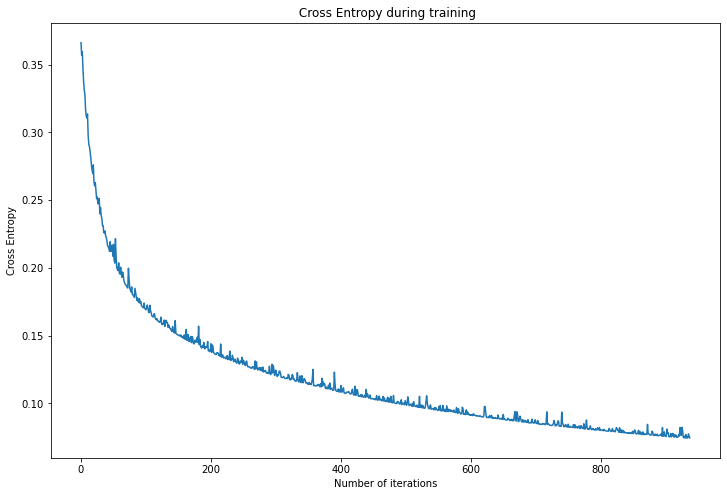

In [113]:
X,Y = datasets.load_iris(return_X_y=True)
MNR = MultiNumialRegression()

MNR.FittingModel(X,Y,learningrate=0.001)
print(MNR.Score(X, Y))
plot_CE = plt.figure(figsize=(12,8))
plt.plot(np.arange(len(MNR.loss)),MNR.loss)
plt.title(" Cross Entropy during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cross Entropy")
plt.show()

/var/folders/lv/hshn6m_945bcxmmv_x23mrf40000gn/T/ipykernel_6359/3156151988.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


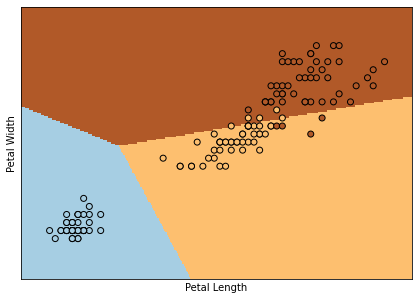

In [112]:
iris = datasets.load_iris()
X = iris.data[:, 2:]  # take petal features
Y = iris.target
MNR = MultiNumialRegression()

# fit the data and Create an instance of MNR
MNR.FittingModel(X,Y,learningrate=0.001)
# Plot the decision boundary. 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
Mu = .02  # step size 
xx, yy = np.meshgrid(np.arange(x_min, x_max, Mu), np.arange(y_min, y_max, Mu))
Z = MNR.PredictClasses(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


In [65]:
# #In code below we have some parameters:
# Lambda is our learning rate between 0.0 and 1.0
# epochs (default: 50) Passes over the training dataset.
# l2 Regularization parameter for L2 regularization. No regularization if l2=0.0.
# random_seed(default: None) Set random state for shuffling and initializing the weights.
# function on_hot is return a matrix which each sample in y is represented as a row and each colums represent the class label.

In [88]:
class MNR2(object):

    def __init__(self, learningrate=0.001, epochs=50, l2_regula=0.0, batches=1, n_classes=None, random_seed=None):

        self.learningrate = learningrate
        self.epochs = epochs
        self.l2_regula = l2_regula
        self.batches = batches
        self.n_classes = n_classes
        self.random_seed = random_seed

    def fiting(self, X, y, parameters=True):
        if parameters:
            if self.n_classes is None:
                self.n_classes = np.max(y) + 1
            self.n_features = X.shape[1]
            self.b, self.w = self.init_parameters(
                weights_shape=(self.n_features, self.n_classes),
                bias_shape=(self.n_classes,),
                random_seed=self.random_seed)
            self.cost_ = []

        y_encoding = self.one_hot_encoding(y = y, n_labels=self.n_classes, dtype=np.float)

        for i in range(self.epochs):
            for idx in self.yield_batches_idx(
                    n_batches=self.batches,
                    data_array=y,
                    shuffle=True):
            #the size of weight is number of features * number of classes and bias is number of classes
         
                net = self.Input(X[idx], self.w, self.b)
                softmax = self.Softmax(net)
                differential = softmax - y_encoding[idx]
                mse = np.mean(differential, axis=0)
                gradient = np.dot(X[idx].T, differential)
                
                self.w -= (self.learningrate * gradient +
                            self.learningrate * self.l2_regula * self.w)
                self.b -= (self.learningrate * np.sum(differential, axis=0))

            # compute the cost
            net = self.Input(X, self.w, self.b)
            softmax = self.Softmax(net)
            cross_entropy = self.Cross_entropy(output=softmax, y_target=y_encoding)
            cost = self.Cost(cross_entropy)
            self.cost_.append(cost)
        return self

    def Fit_Data(self, X, y, parameters=True):

        if self.random_seed is not None:
            np.random.seed(self.random_seed)
        self.fiting(X=X, y=y, parameters=parameters)
        self.fitted = True
        return self
    
    
    def _predict(self, X):
        probability = self.predicted_probability(X)
        return self.to_classlabels(probability)
 
    def predict(self, X):
        if not self.fitted:
            raise AttributeError('The Model is not fit!')
        return self._predict(X)

    def predicted_probability(self, X):
        
        net = self.Input(X, self.w, self.b)
        softmax = self.Softmax(net)
        return softmax

    def Input(self, X, W, b):
        return (X.dot(W) + b)

    def Softmax(self, z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

    def Cross_entropy(self, output, y_target):
        return - np.sum(np.log(output) * (y_target), axis=1)

    def Cost(self, cross_entropy):
        L2_term = self.l2_regula * np.sum(self.w ** 2)
        cross_entropy = cross_entropy + L2_term
        return 0.5 * np.mean(cross_entropy)

    def to_classlabels(self, z):
        return z.argmax(axis=1)
    
    def init_parameters(self, weights_shape, bias_shape=(1,), dtype='float64',
                     scale=0.01, random_seed=None):
       
        if random_seed:
            np.random.seed(random_seed)
        w = np.random.normal(loc=0.0, scale=scale, size=weights_shape)
        b = np.zeros(shape=bias_shape)
        return b.astype(dtype), w.astype(dtype)
    
    def one_hot_encoding(self, y, n_labels, dtype):
       
        oneh = np.zeros((len(y), n_labels))
        for i, val in enumerate(y):
            oneh[i, val] = 1
        return oneh.astype(dtype)    
    
    def yield_batches_idx(self, n_batches, data_array, shuffle=True):
            indices = np.arange(data_array.shape[0])
            if shuffle:
                indices = np.random.permutation(indices)
            if n_batches > 1:
                remainder = data_array.shape[0] % n_batches
                if remainder:
                    minis = np.array_split(indices[:-remainder], n_batches)
                    minis[-1] = np.concatenate((minis[-1],
                                                indices[-remainder:]),
                                               axis=0)
                else:
                    minis = np.array_split(indices, n_batches)

            else:
                minis = (indices,)

            for idx_batch in minis:
                yield idx_batch
    
    def shuffle_arrays(self, arrays):
    
        sh = np.random.permutation(len(arrays[0]))
        return [ary[sh] for ary in arrays]

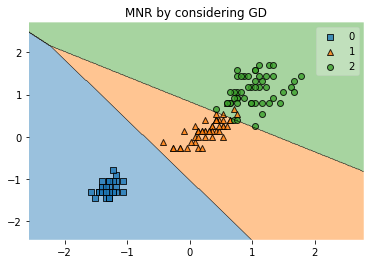

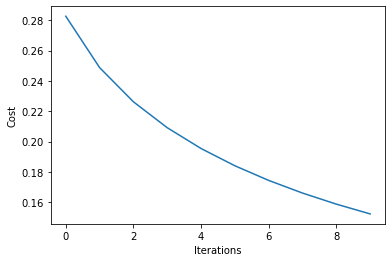

In [90]:
X, y = iris_data()
#Petal length and petal width
X = X[:, 2 : ] 
# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
MNR_S = MNR2(learningrate=0.01, epochs=10, batches=1, random_seed=0)
MNR_S.Fit_Data(X, y)
plot_decision_regions(X, y, clf=MNR_S)
plt.title('MNR by considering GD')
plt.show()
plt.plot(range(len(MNR_S.cost_)), MNR_S.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [91]:
#For another 500 epochs I continue training by considering parameters is False

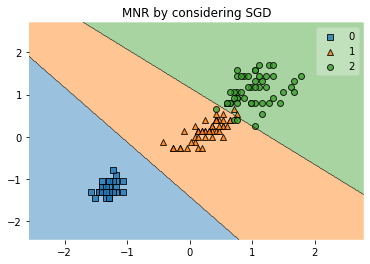

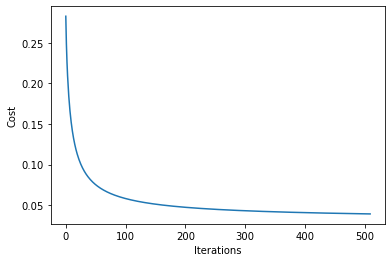

In [92]:
MNR_S.epochs = 500
MNR_S.Fit_Data(X, y, parameters=False)

plot_decision_regions(X, y, clf=MNR_S)
plt.title('MNR by considering SGD')
plt.show()
plt.plot(range(len(MNR_S.cost_)), MNR_S.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [96]:
y_predicted = MNR_S.predict(X)
y_pred = MNR_S.predicted_probability(X)
print('Last 3 Class Labels: %s' % y_predicted[-3:])
print('Last 3 Class Labels:\n %s' % y_pred[-3:])

Last 3 Class Labels: [2 2 2]
Last 3 Class Labels:
 [[2.89026854e-08 1.79424073e-02 9.82057564e-01]
 [1.66006399e-10 7.96449305e-04 9.99203551e-01]
 [6.70447553e-07 1.16808553e-01 8.83190777e-01]]
